**A USE CASE FOR GRAPH DATA STRUCTURES ON SOCIAL MEDIA: A PROPOSED ANALYTICS METHODOLOGY FOR THE PHILIPPINE DEPARTMENT OF HEALTH FACEBOOK PAGE**


**Documentation and Brief Description**

An implementation of the Graph data structure as a Final Project requirement in partial completion of the Diploma in Computer Science course CMSC 204: Data Structures and Algorithms.

**Problem:** Due to the increasing number of users and trends today, people expect more companies or agencies to know how to listen, respond, and offer service to fast and easily accessible outlets, such as social media channels.Literature shows the gap in Government agencies, specifically the DOH, in underutilizing Social Media as a medium for Health Communication and a source of information. Highlighting that the Philippines has the leading time spent on social media but with low user engagement shows how the government may have lapses in data usage and management.

**Objective:** This projects sheds light on how the government, specifically the Department of Health, could leverage its social media presence by understanding its current following. Thus, this paper aims to model a social relationship diagram of Facebook users through a graph data structure to look into the linkages among social entities and their implications. Specifically,

* Represent the interaction data of each social media account as a network map/sociogram composed of nodes (users) and edges (relationships);
* Identify influencers in the social network based on position in the network (betweenness centrality); And
* Detect possible user communities.

In [ ]:
# Import relevant packages
import networkx as nx                                     # A package for working with graphs and networks
import matplotlib.pyplot as plt                           # A package for creating plots and visualization
import community.community_louvain as community_louvain   # A package for detecting communities in networks

In [ ]:
# Clone GIT to set directory and get data
# Original data source from: https://snap.stanford.edu/data/ego-Facebook.html
!git clone https://github.com/miladfa7/Social-Network-Analysis-in-Python.git    # Uncomment this if you haven't cloned the repo.

# !ls # --- use this code to check files within the git repo.

# Define the path to your edgelist file
file_path = "/content/Social-Network-Analysis-in-Python/facebook_combined.txt"

# Initialize an empty graph
graph = nx.Graph()

#### IF LAST 1000
# Read the last 1000 edges from the edgelist. Since the data is big only consider the first 1,000.
with open(file_path, "r") as file:
  lines = file.readlines()[-1000:]  # Read the last 1000 lines
for line in lines:
    source, target = line.strip().split()  # Assuming nodes are space-separated
    graph.add_edge(source, target)

# Print the number of edges in the
print("\n")
print(graph)
print("\n")

# Get the list of edges
edges = list(graph.edges())

# Print the first 10 nodes and edges
print("First 10 data points:")
for i, (node, edge) in enumerate(graph.edges(), start=1):
    if i > 10:
        break
    print(f"Node: {node} | Edge: {edge}")

print("\n")

# Print the last 10 nodes and edges
print("Last 10 data points:")
for i in range(len(edges)-10, len(edges)):
    node, edge = edges[i]
    print(f"Node: {node} | Edge: {edge}")

fatal: destination path 'Social-Network-Analysis-in-Python' already exists and is not an empty directory.


Graph with 273 nodes and 1000 edges


First 10 data points:
Node: 3747 | Edge: 3920
Node: 3747 | Edge: 3933
Node: 3747 | Edge: 3960
Node: 3747 | Edge: 3964
Node: 3747 | Edge: 3967
Node: 3920 | Edge: 3776
Node: 3920 | Edge: 3783
Node: 3920 | Edge: 3791
Node: 3920 | Edge: 3809
Node: 3920 | Edge: 3933


Last 10 data points:
Node: 4021 | Edge: 4030
Node: 4023 | Edge: 4030
Node: 4023 | Edge: 4031
Node: 4023 | Edge: 4034
Node: 4023 | Edge: 4038
Node: 4026 | Edge: 4030
Node: 4027 | Edge: 4031
Node: 4027 | Edge: 4032
Node: 4027 | Edge: 4038
Node: 4031 | Edge: 4038


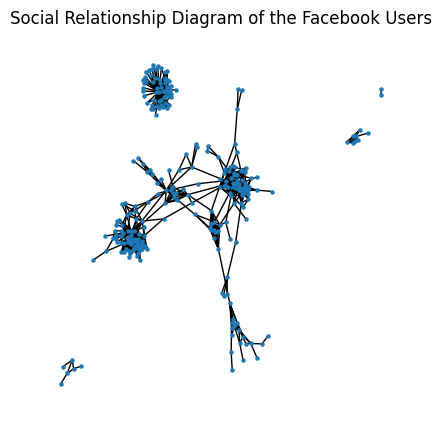

In [ ]:
# Objective #1: Network Map of the Data
# This visualizes the data into a network diagram

random_pos = nx.random_layout(graph, seed=42)       #Seeding the position to keep all the visuals from rotating randomly.
pos = nx.spring_layout(graph, pos=random_pos)

pos = nx.spring_layout(graph)
plt.figure(figsize = (5,5))
nx.draw_networkx(graph, pos = pos, with_labels = False, node_size =5)

plt.title("Social Relationship Diagram of the Facebook Users")
plt.axis('off')
plt.show()

TOP 5 INFLUENCERS:
Node: 3830 | Centrality: 0.22396754792575022
Node: 3918 | Centrality: 0.18458363857744425
Node: 3836 | Centrality: 0.13156160176148354
Node: 3782 | Centrality: 0.09831656660653891
Node: 3960 | Centrality: 0.09220873375096311




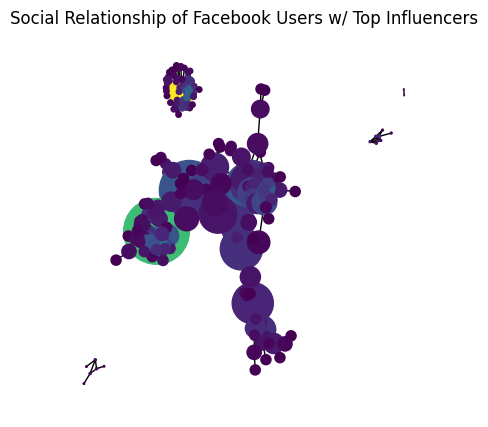

In [ ]:
# Objective #2 : Position in the network (betweenness centrality)
# This looks into the number of times a node acts as a bridge between
# other nodes in the network.

betweenness_centrality = nx.betweenness_centrality(graph, normalized = True, endpoints = True)

node_color = [20000.0 * graph.degree(v) for v in graph]
node_size = [v * 10000 for v in betweenness_centrality.values()]
plt.figure(figsize = (5,5))
nx.draw_networkx(graph, pos = pos, with_labels = False,
                 node_color = node_color,
                 node_size = node_size)

# Sort the nodes based on their betweenness centrality values
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top influencers
print("TOP 5 INFLUENCERS:")
for node, centrality in sorted_nodes[:5]:  #This lists the five node labels with the highest centrality measures.
    print(f"Node: {node} | Centrality: {centrality}")
print("\n")

plt.title("Social Relationship of Facebook Users w/ Top Influencers")
plt.axis('off')
plt.show()

In [ ]:
# Objective #3 : Detect user communities
# This finds communities in the data using the Girvan-Newman algorithm
# subset of nodes that are densely connected to each other and loosely connected to the nodes in the other communities in the same graph
communities = nx.community.girvan_newman(graph)

# Print the top 5 detected communities
top_communities = sorted(communities, key=len, reverse=True)[:5]
print("TOP 5 COMMUNITIES")
for i, community in enumerate(top_communities):
    print(f"Community {i + 1}: {community}")

TOP 5 COMMUNITIES
Community 1: ({'3747'}, {'3920'}, {'3933'}, {'3960'}, {'3964'}, {'3967'}, {'3749'}, {'3751'}, {'3789'}, {'3918'}, {'3923'}, {'3750'}, {'3756'}, {'3779'}, {'3795'}, {'3797'}, {'3830'}, {'3831'}, {'3851'}, {'3877'}, {'3884'}, {'3938'}, {'3948'}, {'3950'}, {'3968'}, {'3971'}, {'3787'}, {'3752'}, {'3761'}, {'3764'}, {'3829'}, {'3915'}, {'3937'}, {'3945'}, {'3972'}, {'3753'}, {'3773'}, {'3778'}, {'3802'}, {'3835'}, {'3850'}, {'3867'}, {'3876'}, {'3907'}, {'3921'}, {'3754'}, {'3927'}, {'3755'}, {'3926'}, {'3772'}, {'3785'}, {'3800'}, {'3824'}, {'3828'}, {'3841'}, {'3886'}, {'3889'}, {'3929'}, {'3943'}, {'3944'}, {'3962'}, {'3757'}, {'3759'}, {'3774'}, {'3836'}, {'3837'}, {'3899'}, {'3957'}, {'3975'}, {'3758'}, {'3768'}, {'3777'}, {'3782'}, {'3786'}, {'3793'}, {'3810'}, {'3818'}, {'3825'}, {'3833'}, {'3855'}, {'3906'}, {'3924'}, {'3947'}, {'3951'}, {'3969'}, {'3965'}, {'3760'}, {'3956'}, {'3762'}, {'3804'}, {'3902'}, {'3930'}, {'3934'}, {'3763'}, {'3799'}, {'3767'}, {'3821'}

**References**

* Bavli, D. (2022, December 30). Identifying Influencers on Social Media: A Guide to Social Network Analysis Using Python. Accessed last April 23, 2023 from https://towardsdatascience.com/identifying-influencers-on-social-media-a-guide-to-social-network-analysis-using-python-e05f4da151b8

* Farzalizadeh, M. (2019, July 15). Social Network Analysis in Python (facebook). Accessed last April 23, 2023 from https://www.linkedin.com/pulse/social-network-analysis-python-facebook-milad-farzalizadeh/

* McAuley, J. & Leskovec, J. (2012). Learning to Discover Social Circles in Ego Networks. NIPS.
